# Exercício 02
## João Paulo de Melo

Criando um EDA

In [68]:
%matplotlib inline

import numpy as np 
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [168]:
df_train = pd.read_csv("./Aula02/train.csv", parse_dates=['Dates'], index_col='Dates')
df_test = pd.read_csv("./Aula02/test.csv", parse_dates=['Dates'], index_col='Dates')
df_train.head(5)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [173]:
df_train.describe(include='all')

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,39,879,7,10,17,23228,NaN,NaN
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


In [172]:
df_test.describe(include='all')

,Id,DayOfWeek,PdDistrict,Address,X,Y
count,884262.000000,884262,884262,884262,884262.000000,884262.000000
unique,NaN,7,10,23184,NaN,NaN
top,NaN,Friday,SOUTHERN,800 Block of BRYANT ST,NaN,NaN
freq,NaN,134703,157456,26984,NaN,NaN
mean,442130.500000,NaN,NaN,NaN,-122.422693,37.771476
std,255264.596206,NaN,NaN,NaN,0.030985,0.484824
min,0.000000,NaN,NaN,NaN,-122.513642,37.707879
25%,221065.250000,NaN,NaN,NaN,-122.433069,37.752374
50%,442130.500000,NaN,NaN,NaN,-122.416517,37.775421
75%,663195.750000,NaN,NaN,NaN,-122.406959,37.784353


In [3]:
categories = df_train["Category"].unique()
category_map = {}
for key, crime in enumerate(categories):
    category_map[key] = crime
    
print(category_map)
print("\nQuantidade de crimes:",len(categories))

{0: 'WARRANTS', 1: 'OTHER OFFENSES', 2: 'LARCENY/THEFT', 3: 'VEHICLE THEFT', 4: 'VANDALISM', 5: 'NON-CRIMINAL', 6: 'ROBBERY', 7: 'ASSAULT', 8: 'WEAPON LAWS', 9: 'BURGLARY', 10: 'SUSPICIOUS OCC', 11: 'DRUNKENNESS', 12: 'FORGERY/COUNTERFEITING', 13: 'DRUG/NARCOTIC', 14: 'STOLEN PROPERTY', 15: 'SECONDARY CODES', 16: 'TRESPASS', 17: 'MISSING PERSON', 18: 'FRAUD', 19: 'KIDNAPPING', 20: 'RUNAWAY', 21: 'DRIVING UNDER THE INFLUENCE', 22: 'SEX OFFENSES FORCIBLE', 23: 'PROSTITUTION', 24: 'DISORDERLY CONDUCT', 25: 'ARSON', 26: 'FAMILY OFFENSES', 27: 'LIQUOR LAWS', 28: 'BRIBERY', 29: 'EMBEZZLEMENT', 30: 'SUICIDE', 31: 'LOITERING', 32: 'SEX OFFENSES NON FORCIBLE', 33: 'EXTORTION', 34: 'GAMBLING', 35: 'BAD CHECKS', 36: 'TREA', 37: 'RECOVERED VEHICLE', 38: 'PORNOGRAPHY/OBSCENE MAT'}

Quantidade de crimes: 39


In [4]:
#df_train["Category"] = df_train["Category"].map(category_map)

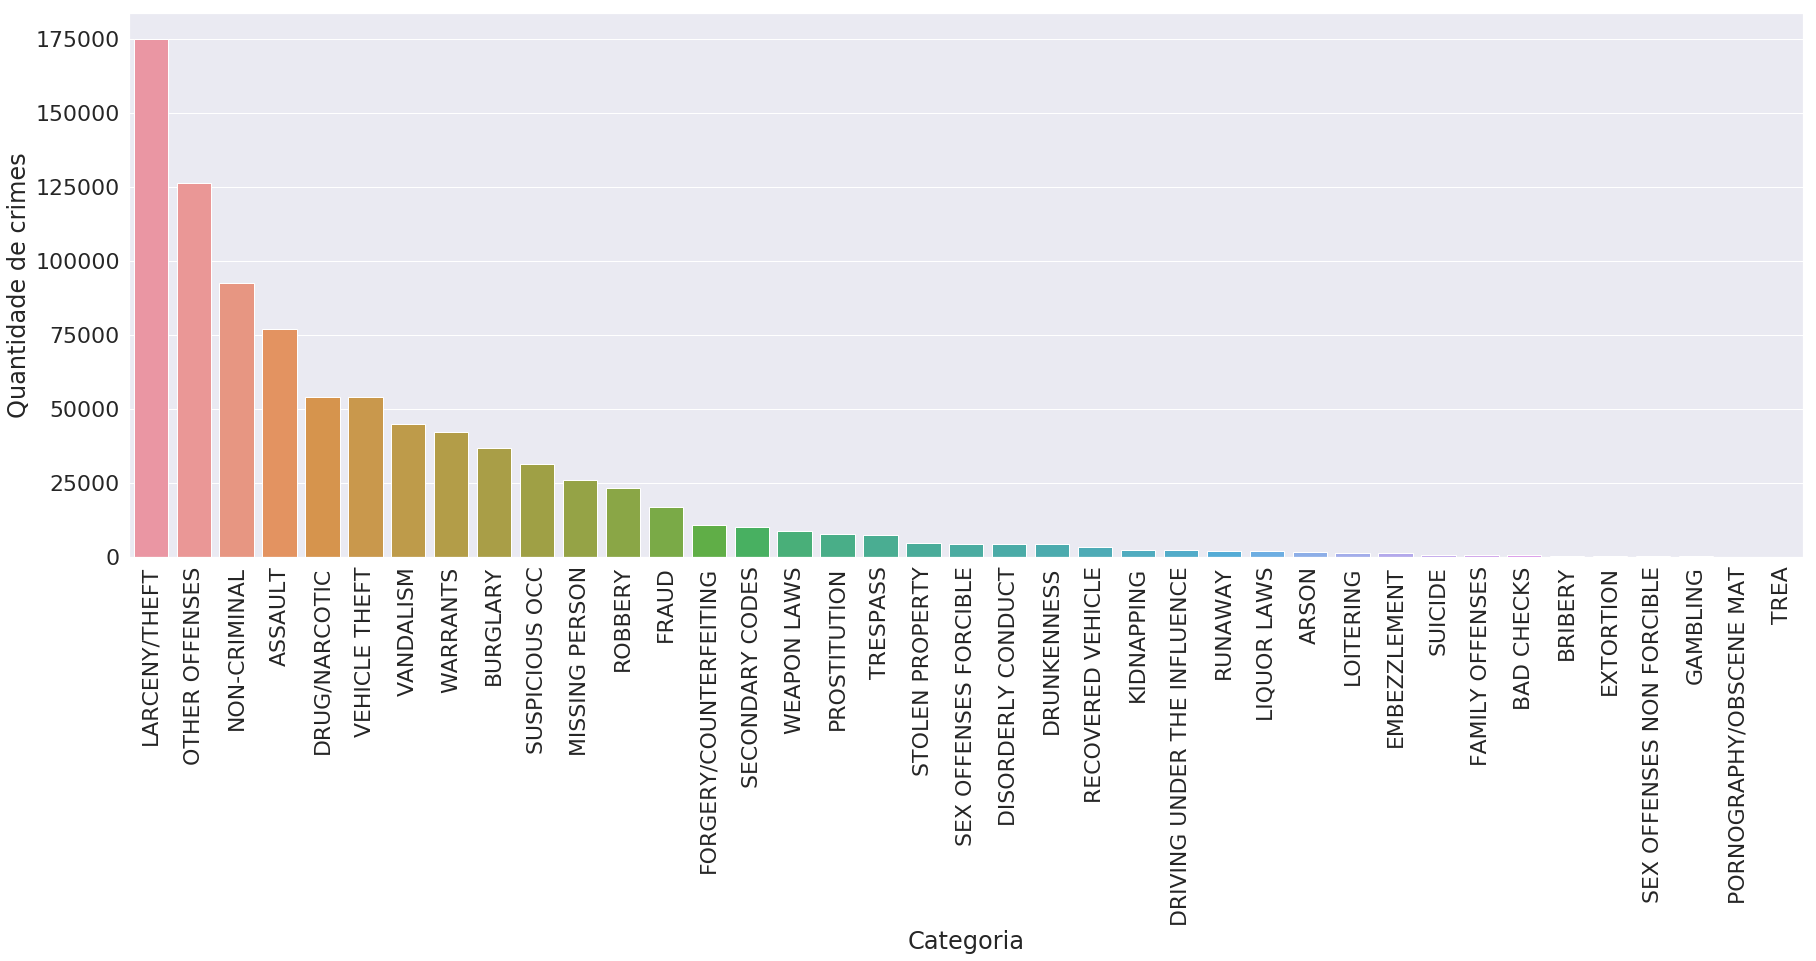

In [5]:
ammount_crimes = df_train["Category"].value_counts()
ammount_crimes

plt.figure(figsize=(30, 10))

sns.set(font_scale=2)
plot = sns.barplot(
    x=ammount_crimes.index, 
    y=ammount_crimes
)
plot.set_xticklabels(ammount_crimes.index,rotation=90)

plt.xlabel('Categoria')
plt.ylabel('Quantidade de crimes')
plt.show()

In [176]:
df_train['DayOfWeek'] = df_train.index.dayofweek
df_train['Hour'] = df_train.index.hour
df_train['Month'] = df_train.index.month
df_train['Year'] = df_train.index.year
df_train['DayOfMonth'] = df_train.index.day

In [7]:
pareto_crime = ammount_crimes / sum(ammount_crimes)
pareto_crime = pareto_crime.cumsum()

ammount_crime_analized = 12

Main_Crime_Categories = list(pareto_crime[0:ammount_crime_analized].index)
print("As seguintes categorias: ")
print(Main_Crime_Categories)
print("São responsáveis por {:.2%} dos crimes".format(pareto_crime[ammount_crime_analized]))

As seguintes categorias: 
['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY']
São responsáveis por 90.97% dos crimes


In [8]:
df_train["DayOfWeek"] = df_train["DayOfWeek"].map({
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
})

df_train[["DayOfWeek","Category"]]

,DayOfWeek,Category
Dates,,
2015-05-13 23:53:00,Wednesday,WARRANTS
2015-05-13 23:53:00,Wednesday,OTHER OFFENSES
2015-05-13 23:33:00,Wednesday,OTHER OFFENSES
2015-05-13 23:30:00,Wednesday,LARCENY/THEFT
2015-05-13 23:30:00,Wednesday,LARCENY/THEFT
2015-05-13 23:30:00,Wednesday,LARCENY/THEFT
2015-05-13 23:30:00,Wednesday,VEHICLE THEFT
2015-05-13 23:30:00,Wednesday,VEHICLE THEFT
2015-05-13 23:00:00,Wednesday,LARCENY/THEFT


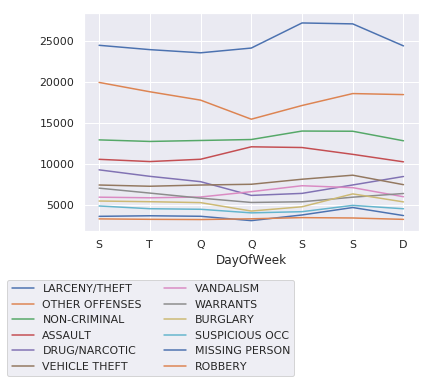

In [174]:
tmp = df_train[["DayOfWeek","Category"]]

sns.set(font_scale=1)
pt = pd.pivot_table(
    tmp,
    index="DayOfWeek",
    columns="Category",
    aggfunc=len,
    fill_value=0
)
ax = pt.loc[df_train["DayOfWeek"].unique(),
       Main_Crime_Categories].plot();
ax.set_xticklabels(['', 'S','T','Q','Q','S','S','D'])
ax.legend(loc=9, bbox_to_anchor=(0.2, -0.2), ncol=2);

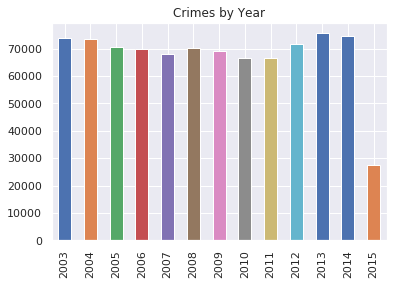

In [177]:
df_train.Year.value_counts().sort_index().plot(kind='bar',title='Crimes by Year');

Crimes by month an each year


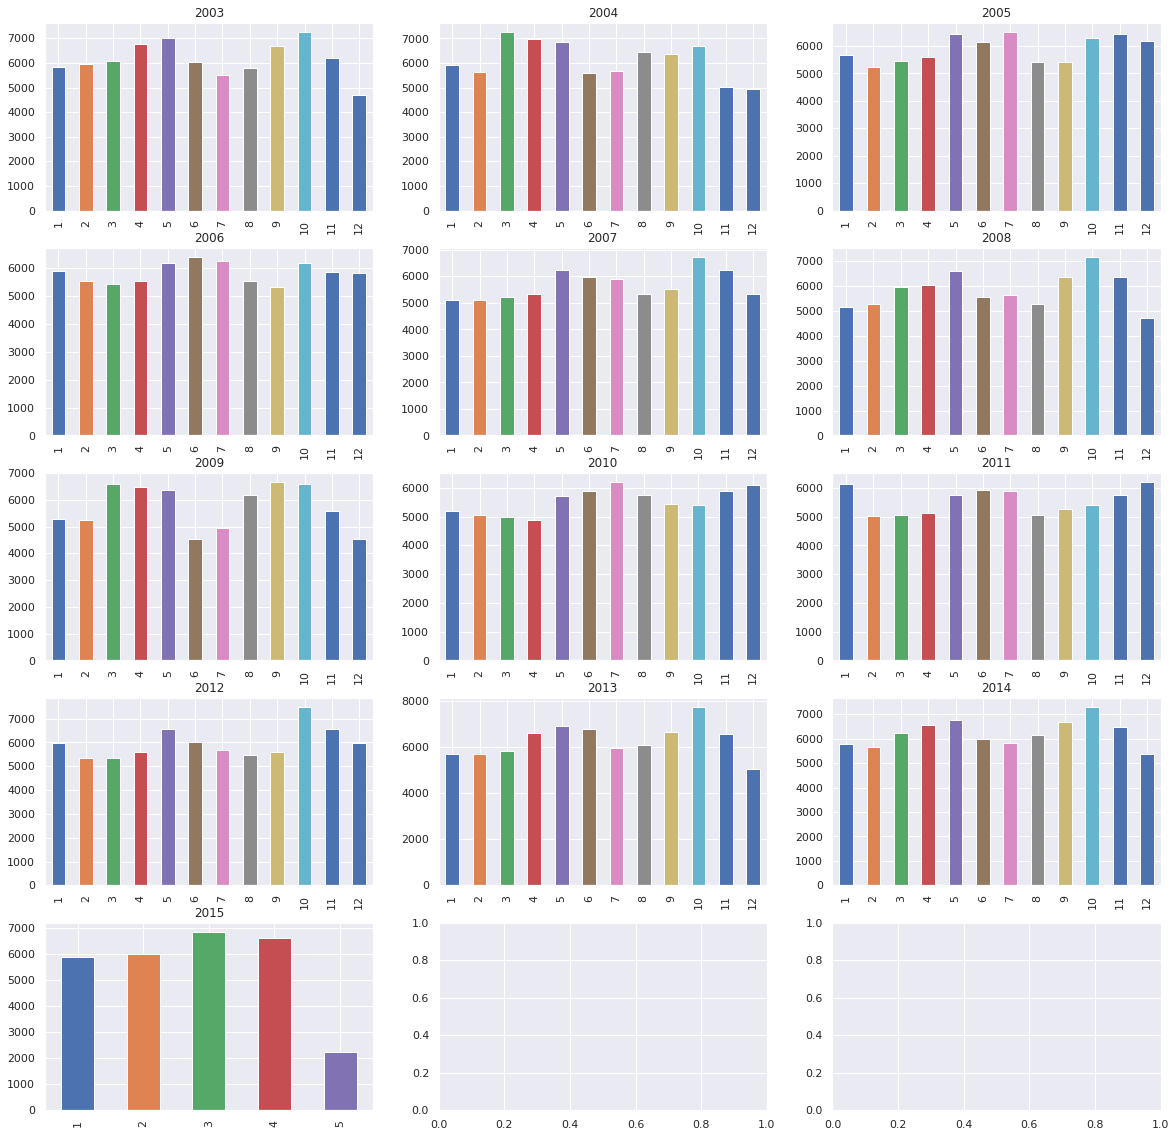

In [110]:
space = math.ceil(len(df_train.Year.value_counts().sort_index())/3)

fig, axs = plt.subplots(space, 3, figsize=(20, 20))

year = 0
years = df_train.Year.unique()

years.sort()

for i in range(space):
    for j in range(3):
        df_train[df_train.Year == years[year]].Month.value_counts().sort_index().plot(kind='bar',title=years[year], ax=axs[i][j])
        year += 1
        if year == len(years):
            break 

print("Crimes by month an each year")

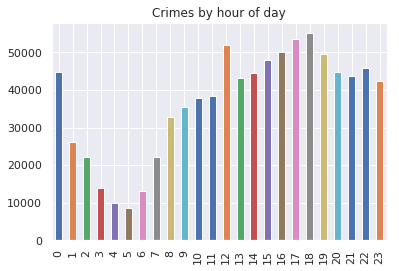

In [178]:
df_train.Hour.value_counts().sort_index().plot(kind='bar', title='Crimes by hour of day');

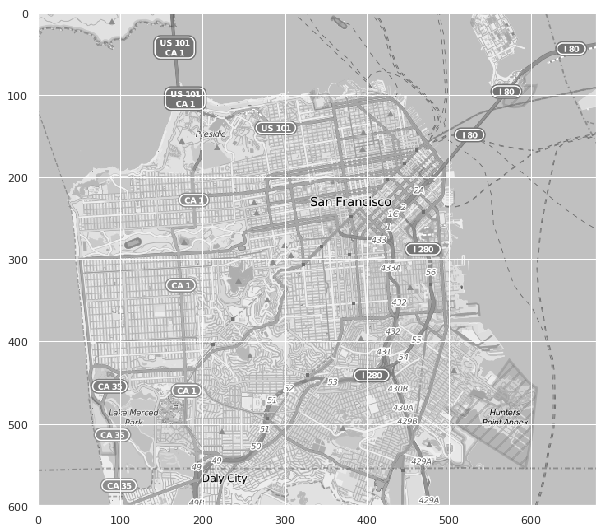

In [160]:
mapdata = np.loadtxt("./Aula02/sf_map_copyright_openstreetmap_contributors.txt")
plt.figure(figsize=(10,10))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'));

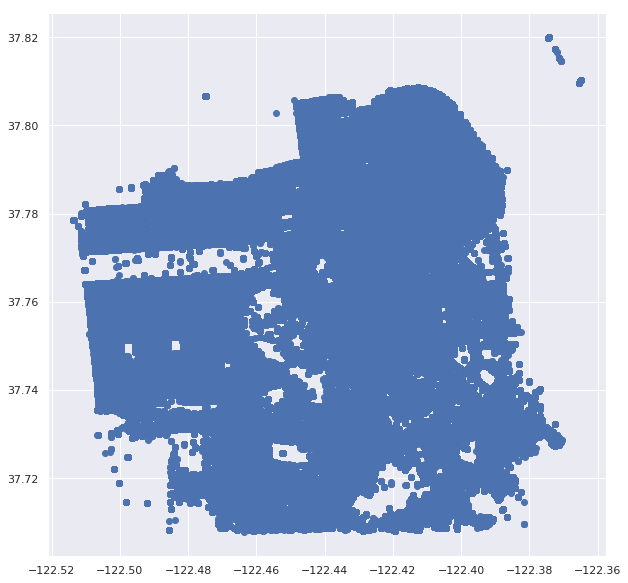

In [164]:
df_train = df_train[(df_train.X != -120.5) & (df_train.Y != 90)]
plt.figure(figsize=(10,10))
plt.plot(scale.X, scale.Y,'bo')

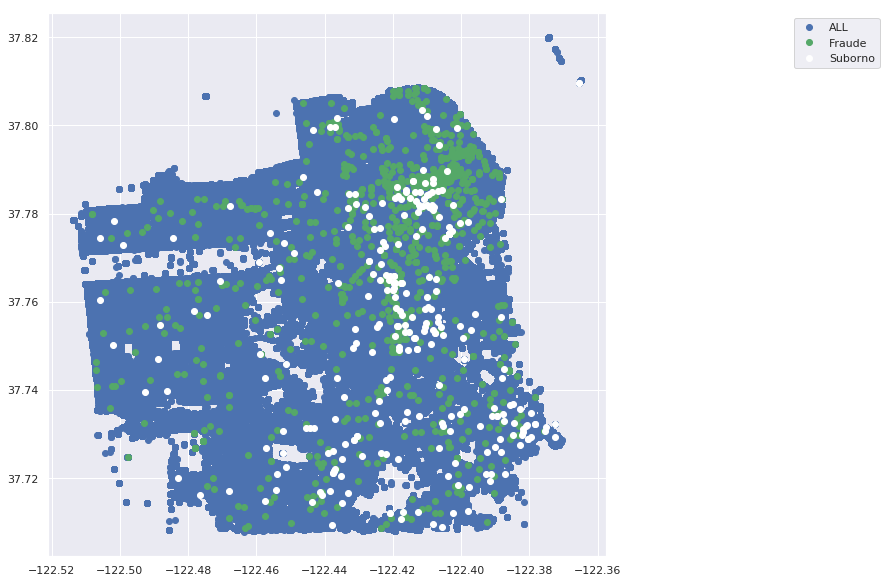

In [166]:
# get rid of bogus lat/long df_train
plt.figure(figsize=(10,10))
df_train = df_train[(df_train.X != -120.5) & (df_train.Y != 90)]
plt.plot(df_train.X,df_train.Y,'bo',label='ALL')
tmp_df = df_train[df_train.Category == 'EMBEZZLEMENT']
plt.plot(tmp_df.X,tmp_df.Y,'go',label='Fraude')
tmp_df = df_train[df_train.Category == 'BRIBERY']
plt.plot(tmp_df.X,tmp_df.Y,'wo',label='Suborno')
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.5,1))